In [1]:
# Principle Component Analysis

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('../DATA/student-por.csv')
var_mod = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','guardian', 'schoolsup','paid','reason','famsup','activities','nursery','higher', 'internet', 'romantic']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
for i in var_mod:
    df[i] = le.fit_transform(df[i])

if 'new' not in df:
    df.insert(33,'new',0)

for i in range(0,len(df)):
    df.loc[df['G3'] <= 7, 'new'] = 0
    df.loc[(df['G3']>7) & (df['G3']<=14) , 'new'] = 1
    df.loc[df['G3'] >14, 'new'] = 2

In [11]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,new
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,1
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,1
5,0,1,16,1,1,1,4,3,3,2,...,4,2,1,2,5,6,12,12,13,1
6,0,1,16,1,1,1,2,2,2,2,...,4,4,1,1,3,0,13,12,13,1
7,0,0,17,1,0,0,4,4,2,4,...,1,4,1,1,1,2,10,13,13,1
8,0,1,15,1,1,0,3,2,3,2,...,2,2,1,1,1,0,15,16,17,2
9,0,1,15,1,0,1,3,4,2,2,...,5,1,1,1,5,0,12,12,13,1


In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df.iloc[:, 1:].values, df.iloc[:, 33].values
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [15]:
X

array([[ 0, 18,  1, ..., 11, 11,  1],
       [ 0, 17,  1, ..., 11, 11,  1],
       [ 0, 15,  1, ..., 13, 12,  1],
       ..., 
       [ 0, 18,  1, ..., 12,  9,  1],
       [ 1, 17,  1, ..., 10, 10,  1],
       [ 1, 18,  0, ..., 11, 11,  1]])

In [16]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2,

In [17]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.82412187  2.48099745  1.85081993  1.80558431  1.50230436  1.40646989
  0.06686558  1.31887669  0.14718988  0.26053749  0.27451488  0.32002118
  1.19793921  1.15715098  1.13196834  1.07599045  0.46019253  0.46188022
  0.50110677  0.98462567  0.96543049  0.94668486  0.5571875   0.59858701
  0.88071004  0.85470055  0.83368456  0.6305383   0.65207232  0.68459093
  0.74362429  0.77468142  0.72119773]


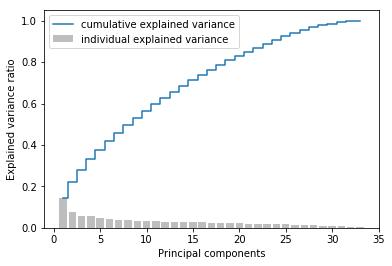

In [26]:
>>> tot = sum(eigen_vals)
>>> var_exp = [(i / tot) for i in
... sorted(eigen_vals, reverse=True)]
>>> cum_var_exp = np.cumsum(var_exp)
>>> import matplotlib.pyplot as plt
>>> plt.bar(range(1,34),var_exp, alpha=0.5, align='center',label='individual explained variance')
>>> plt.step(range(1,34), cum_var_exp, where='mid',label='cumulative explained variance')
>>> plt.ylabel('Explained variance ratio')
>>> plt.xlabel('Principal components')
>>> plt.legend(loc='best')
>>> plt.show()

In [27]:
>>> eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
... for i in range(len(eigen_vals))]
>>> eigen_pairs.sort(reverse=True)

In [28]:
>>> w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
... eigen_pairs[1][1][:, np.newaxis]))
>>> print('Matrix W:\n',w)

Matrix W:
 [[ 0.06482513 -0.29460671]
 [ 0.13519064 -0.05142824]
 [-0.1146257  -0.15700549]
 [-0.02246421 -0.02964079]
 [-0.0026975  -0.02035642]
 [-0.22644955 -0.32747101]
 [-0.16845974 -0.31383011]
 [-0.15008159 -0.29931562]
 [-0.08066527 -0.10824462]
 [-0.09956749  0.01543192]
 [ 0.07723887 -0.08259707]
 [ 0.1240933   0.17085138]
 [-0.16330982  0.10851404]
 [ 0.23530458 -0.02766756]
 [-0.00574773  0.0874309 ]
 [-0.07303663 -0.00304463]
 [ 0.00680369 -0.11118978]
 [-0.03932739 -0.1748031 ]
 [-0.04133473 -0.00350317]
 [-0.23967359  0.00671302]
 [-0.12253003 -0.24848561]
 [ 0.08391738  0.02555048]
 [-0.07575811 -0.00882085]
 [ 0.07336201 -0.20916513]
 [ 0.06761178 -0.26855117]
 [ 0.14146379 -0.33443583]
 [ 0.13379232 -0.3697209 ]
 [ 0.03795776 -0.14981215]
 [ 0.08963951 -0.15663394]
 [-0.38886567  0.0339008 ]
 [-0.40192271  0.02872152]
 [-0.39737419  0.03924275]
 [-0.34633804  0.02801966]]


In [29]:
>>> X_train_std[0].dot(w)

array([ 2.14425607,  0.79529655])

In [30]:
X_train_pca = X_train_std.dot(w)

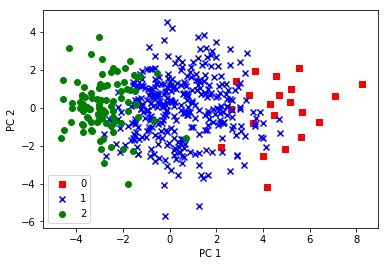

In [31]:
>>> colors = ['r', 'b', 'g']
>>> markers = ['s', 'x', 'o']
>>> for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
>>> plt.xlabel('PC 1')
>>> plt.ylabel('PC 2')
>>> plt.legend(loc='lower left')
>>> plt.show()

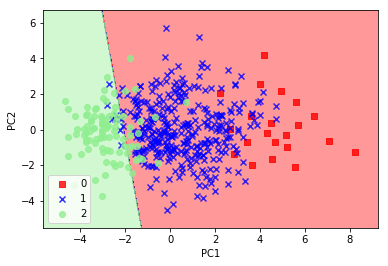

In [32]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

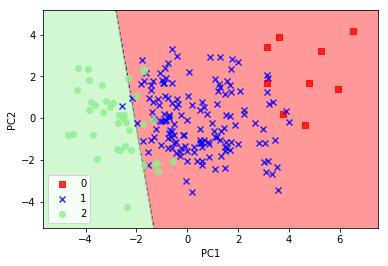

In [33]:
>>> plot_decision_regions(X_test_pca, y_test, classifier=lr)
>>> plt.xlabel('PC1')
>>> plt.ylabel('PC2')
>>> plt.legend(loc='lower left')
>>> plt.show()

In [34]:
# LDA via ScikitLearn

In [53]:
>>> from sklearn.lda import LDA
>>> lda = LDA(n_components=2)
>>> X_train_lda = lda.fit_transform(X_train_std, y_train)
print(X_train_std)
print(len(X_train_std))
print(len(X_train_lda))
print(len(y_train))
print(type(y_train))
print(type(X_train_lda))
print(type(X_train_std))
print(X_train_lda)
print(y_train)

[[ 1.18410996  1.04875452  0.66772739 ..., -0.88307694 -0.57566203
  -0.33363381]
 [-0.84451616 -0.57350971 -1.49761715 ..., -0.53626299 -0.26963093
  -0.33363381]
 [ 1.18410996 -0.57350971  0.66772739 ..., -0.88307694 -0.57566203
  -0.33363381]
 ..., 
 [ 1.18410996 -0.57350971 -1.49761715 ..., -0.88307694 -0.26963093
  -0.33363381]
 [-0.84451616  0.2376224  -1.49761715 ..., -1.2298909  -0.88169313
  -0.33363381]
 [ 1.18410996  1.04875452 -1.49761715 ...,  0.15736492  0.34243128
  -0.33363381]]
454
454
454
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [ -1.02694846e+15]
 [ -1.40570892e+14]
 [  7.45806677e+14]
 [ -1.40570892e+14]
 [  7.45806677e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+14]
 [  7.45806677e+14]
 [ -1.40570892e+14]
 [  7.45806677e+14]
 [ -1.40570892e+14]
 [ -1.40570892e+

In [51]:
>>> lr = LogisticRegression()
>>> lr = lr.fit(X_train_lda, y_train)
>>> plot_decision_regions(X_train_lda, y_train, classifier=lr)
>>> plt.xlabel('LD 1')
>>> plt.ylabel('LD 2')
>>> plt.legend(loc='lower left')
>>> plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1